In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

/Users/jiaruiming/.local/lib/python3.6/site-packages/gym/core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"
/Users/jiaruiming/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
env = gym.make('LunarLander-v2')
# env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

from dqn_agent import Agent
agent = Agent(state_size=8, action_size=4, seed=0)

State shape:  (8,)
Number of actions:  4


In [6]:
# watch an untrained agent
state = env.reset(seed=0)[0]
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _, info = env.step(action)
    if done:
        break 
        
env.close()

In [7]:
env = gym.make('LunarLander-v2')
env.reset(seed=0)
agent = Agent(state_size=8, action_size=4, seed=0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


Episode 100	Average Score: -73.05
Episode 200	Average Score: -39.35
Episode 300	Average Score: 29.873
Episode 400	Average Score: 174.83
Episode 417	Average Score: 200.78
Environment solved in 317 episodes!	Average Score: 200.78


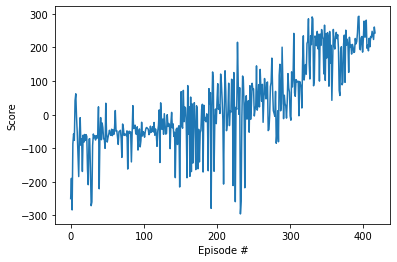

In [9]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(seed=0)[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _, info = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [12]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
import time
time.sleep(2)
env = gym.make('LunarLander-v2', render_mode='human')
for i in range(3):
    scores = 0
    state = env.reset()[0]
    for j in range(2000):
        action = agent.act(state)
        #env.render()
        state, reward, done, _, info = env.step(action)
        scores += reward
        if done or _:
            state = env.reset()[0]
            break
    print(scores)
            
env.close()

142.82573896042285
239.83380530665082
209.257416049991
